In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('non_zero_data.csv')
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110


In [3]:
data['profit_margin'] = (data['revenue'] - data['budget']) / data['revenue']
data['log_profit_margin'] = data['profit_margin'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)
data['log_budget_revenue'] = data['budget_revenue_ratio'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)


# Print the DataFrame with the new 'profit_margin' column & to remove the skewness of the values as there are some extreme values
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio,profit_margin,log_profit_margin,log_budget_revenue
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100,0.117900,0.111452,0.632388
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483,0.975517,0.680830,0.024188
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706,0.873294,0.627699,0.119298
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458,0.931542,0.658319,0.066216
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110,0.930890,0.657981,0.066826


In [4]:
data['log_budget_revenue'].describe()

count    5745.000000
mean        0.614536
std         0.810742
min         0.000241
25%         0.200612
50%         0.367718
75%         0.699670
max        12.748727
Name: log_budget_revenue, dtype: float64

In [5]:
#compare the budget revenue ratio with profit margin to gain insights about financial state
#compare each movies financial state if they have properly budgeted 
financial_performance = pd.DataFrame(data[['log_budget_revenue','log_profit_margin']])
pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns

print(financial_performance)
# financial_performance.head()

      log_budget_revenue  log_profit_margin
0               0.632388           0.111452
1               0.024188           0.680830
2               0.119298           0.627699
3               0.066216           0.658319
4               0.066826           0.657981
5               0.300105           0.500775
6               0.123986           0.624868
7               0.169034           0.596548
8               0.043167           0.670844
9               0.189962           0.582660
10              0.038969           0.673078
11              0.080669           0.650233
12              0.078066           0.651703
13              0.030382           0.677603
14              0.428001           0.382409
15              2.098901                NaN
16              0.348542           0.459322
17              0.083347           0.648715
18              1.913289                NaN
19              0.485303           0.318696
20              0.024904           0.680458
21              0.102282        

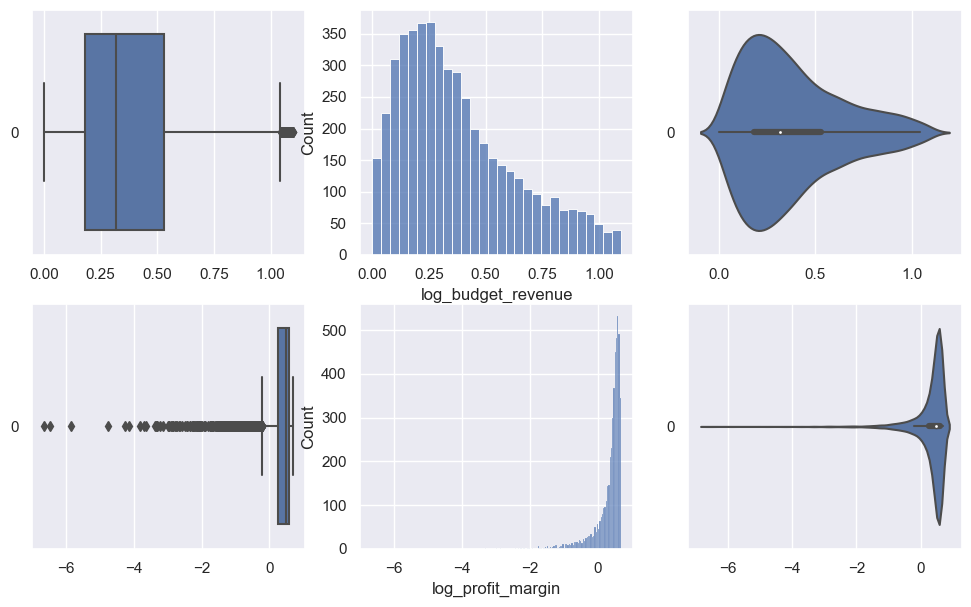

In [6]:
financial_performance = financial_performance.dropna()
financial_performance = financial_performance.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs after handling infinite values
financial_performance = financial_performance.dropna()

f, axes = plt.subplots(2, 3, figsize=(12, 7))

count = 0
for var in financial_performance:
    sb.boxplot(data = financial_performance[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = financial_performance[var], ax = axes[count,1])
    sb.violinplot(data = financial_performance[var], orient = "h", ax = axes[count,2])
    count += 1

                    log_budget_revenue  log_profit_margin
log_budget_revenue            1.000000          -0.839091
log_profit_margin            -0.839091           1.000000


<Axes: >

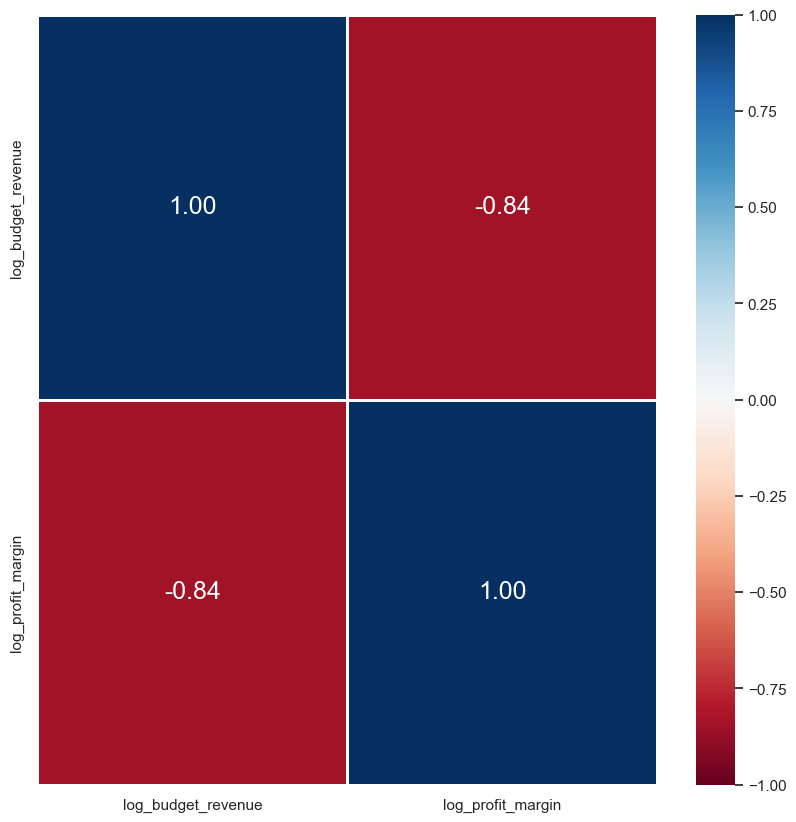

In [7]:
print(financial_performance.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(financial_performance.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

/Users/lermincheo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


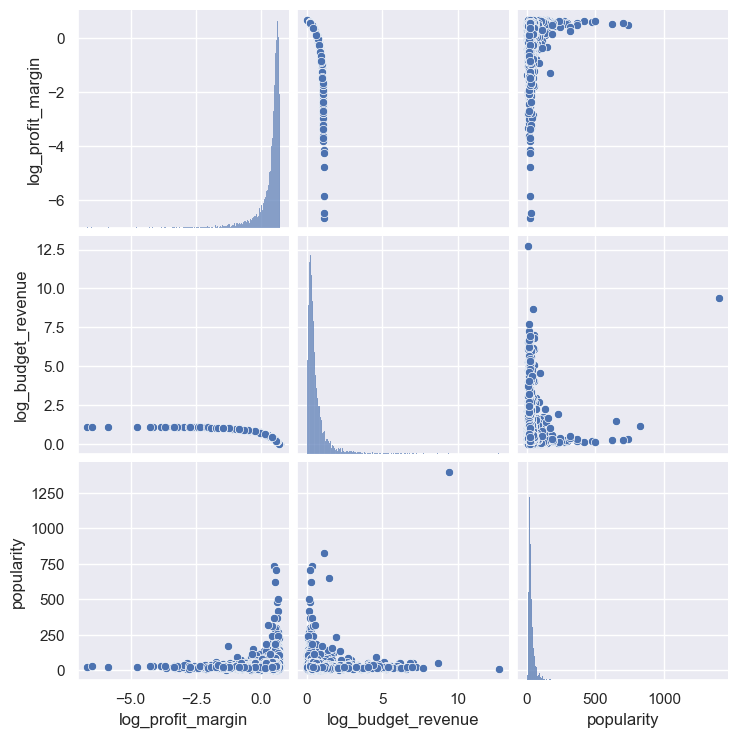

                    log_profit_margin  log_budget_revenue  popularity
log_profit_margin            1.000000           -0.839091    0.143870
log_budget_revenue          -0.839091            1.000000   -0.043819
popularity                   0.143870           -0.043819    1.000000


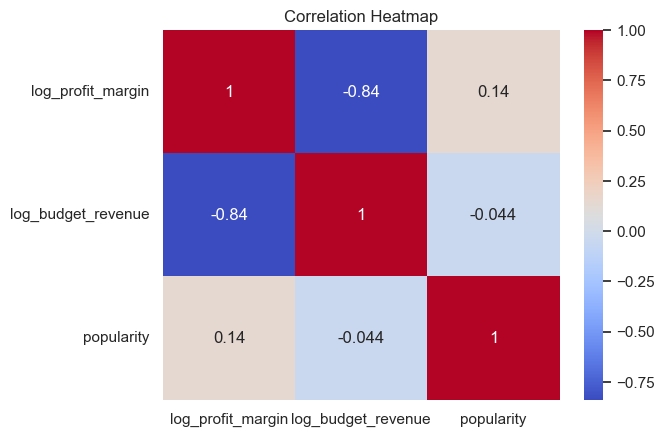

In [8]:
data1 = pd.DataFrame(data[['log_profit_margin', 'log_budget_revenue', 'popularity']])

#Data Visualization
sb.pairplot(data1)
plt.show()

# Correlation Analysis
correlation_matrix = data1.corr()
print(correlation_matrix)

# Plotting correlation heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Users/lermincheo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


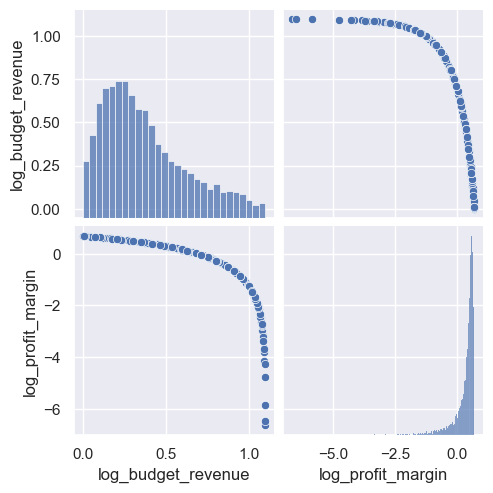

In [9]:
sb.pairplot(data = financial_performance)

In [10]:
#check for unqiue movie companies and to see which movie companies generate the most profit/ popularity 

print("Unique Names of Product Companies :", len(data["production_companies"].unique()))
print("Data dims : ", data.shape)

Unique Names of Product Companies : 5075
Data dims :  (5745, 20)


In [11]:
#based on the above there are a few duplicate names
dupid_data = data[data.duplicated("production_companies", keep = False)]
dupid_data.sort_values(by = "production_companies").head(n = 10)



,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio,profit_margin,log_profit_margin,log_budget_revenue
3541,False,"[12, 28, 878, 53]",36668,en,2.477,2006-05-24,X-Men: The Last Stand,6.409,9254,459359555.0,"[""The Donners' Company"", '20th Century Fox']",210000000.0,2006,5,4,Spring,0.457158,0.542842,0.433626,0.376488
3552,False,"[28, 878, 12]",76170,en,10.656,2013-07-21,The Wolverine,6.400,9224,415440673.0,"[""The Donners' Company"", '20th Century Fox']",120000000.0,2013,7,3,Summer,0.288850,0.711150,0.537166,0.253750
1030,False,"[16, 35, 10751, 12]",425,en,83.789,2002-03-10,Ice Age,7.359,12698,383257136.0,"['20th Century Fox Animation', 'Blue Sky Studi...",59000000.0,2002,3,4,Spring,0.153944,0.846056,0.613052,0.143185
2687,False,"[16, 10751, 35, 12]",950,en,61.499,2006-03-29,Ice Age: The Meltdown,6.698,9343,660998756.0,"['20th Century Fox Animation', 'Blue Sky Studi...",80000000.0,2006,3,4,Spring,0.121029,0.878971,0.630724,0.114247
598,False,"[18, 10749, 10402]",824,en,24.032,2001-05-24,Moulin Rouge!,7.573,4345,179213434.0,"['20th Century Fox', 'Bazmark']",52500000.0,2001,5,3,Spring,0.292947,0.707053,0.534769,0.256924
3706,False,"[18, 10749]",454,en,34.849,1996-11-01,Romeo + Juliet,6.793,4804,147298761.0,"['20th Century Fox', 'Bazmark']",14500000.0,1996,11,2,Fall,0.098439,0.901561,0.642675,0.093890
4269,False,"[878, 27, 28]",8078,en,44.404,1997-11-12,Alien Resurrection,6.100,4560,162000000.0,"['20th Century Fox', 'Brandywine Productions']",70000000.0,1997,11,3,Fall,0.432099,0.567901,0.449738,0.359141
102,False,"[27, 878]",348,en,119.696,1979-05-25,Alien,8.149,13750,104931801.0,"['20th Century Fox', 'Brandywine Productions']",11000000.0,1979,5,2,Spring,0.104830,0.895170,0.639309,0.099691
3684,False,"[878, 28, 27]",8077,en,60.215,1992-05-22,Alien³,6.400,5271,159773545.0,"['20th Century Fox', 'Brandywine Productions']",50000000.0,1992,5,3,Spring,0.312943,0.687057,0.522986,0.272271
3803,False,"[35, 12, 10751, 80, 18]",11212,en,32.397,1994-07-01,Baby's Day Out,6.315,1258,16671505.0,"['20th Century Fox', 'Hughes Entertainment']",50000000.0,1994,7,5,Summer,2.999129,-1.999129,NaN,1.386077


In [12]:
print("Movies with Duplicate production companies :", len(dupid_data))
dupids = dupid_data["production_companies"].unique()
print("Unique movies with duplicate production companies :", len(dupids))
print()

# Group Pokemons with same ID
print("# \t Count \t List of movies with Duplicate production companies")
print()
for dupid in dupids:
    dupid_list = list(dupid_data[dupid_data["production_companies"] == dupid]["title"])
    dupid_data["no_of_movies"] = len(dupid_list)
    print(dupid, "\t", len(dupid_list), "\t", dupid_list)

Movies with Duplicate production companies : 898
Unique movies with duplicate production companies : 228

# 	 Count 	 List of movies with Duplicate production companies

['Studio Ghibli'] 	 3 	 ['Spirited Away', 'Grave of the Fireflies', 'The Boy and the Heron']
['New Line Cinema', 'WingNut Films', 'The Saul Zaentz Company'] 	 3 	 ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Two Towers']
['Winkler Films'] 	 3 	 ['GoodFellas', 'Rocky', 'Enough']
['TOHO'] 	 2 	 ['Seven Samurai', 'Godzilla']
['Legendary Pictures'] 	 4 	 ['Dune: Part Two', 'Dune', 'Godzilla vs. Kong', 'Godzilla']
['Lucasfilm Ltd.'] 	 10 	 ['The Empire Strikes Back', 'Return of the Jedi', 'Rogue One: A Star Wars Story', 'Star Wars: Episode III - Revenge of the Sith', 'Star Wars: The Last Jedi', 'Indiana Jones and the Dial of Destiny', 'Solo: A Star Wars Story', 'Star Wars: Episode II - Attack of the Clones', 'Star Wars: Episode I - The Pha

/var/folders/50/9n76szm974921blsvbxt224w0000gn/T/ipykernel_1986/4019570388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupid_data["no_of_movies"] = len(dupid_list)


In [13]:
print("Movies with Duplicate production companies:", len(dupid_data))
dupids = dupid_data["production_companies"].unique()
print("Unique movies with duplicate production companies:", len(dupids))
print()

# Group movies with the same production company
print("# \t Count \t Production Company \t List of Movies with Duplicate production companies")
print()
for i, dupid in enumerate(dupids):
    dupid_list = list(dupid_data[dupid_data["production_companies"] == dupid]["title"])
    no_of_movies = len(dupid_list)

# Update the DataFrame with the number of movies per production company
dupid_data["no_of_movies"] = dupid_data.groupby("production_companies")["title"].transform("count")

# Sort the DataFrame based on the number of movies per production company
sorted_dupid_data = dupid_data.sort_values(by="no_of_movies", ascending=False)

# Print the top production companies with the most movie lists
print("\nTop production companies with the most movie lists:")
print(sorted_dupid_data[["production_companies", "no_of_movies"]].drop_duplicates().head())


Movies with Duplicate production companies: 898
Unique movies with duplicate production companies: 228

# 	 Count 	 Production Company 	 List of Movies with Duplicate production companies


Top production companies with the most movie lists:
           production_companies  no_of_movies
3815              ['Paramount']            54
692   ['Warner Bros. Pictures']            30
4437     ['Universal Pictures']            29
3118      ['Columbia Pictures']            28
1474       ['20th Century Fox']            26


/var/folders/50/9n76szm974921blsvbxt224w0000gn/T/ipykernel_1986/4178937816.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupid_data["no_of_movies"] = dupid_data.groupby("production_companies")["title"].transform("count")


based on the above, paramount produces the most amount of movies followed by warner bros pictures, then universal pictures. 

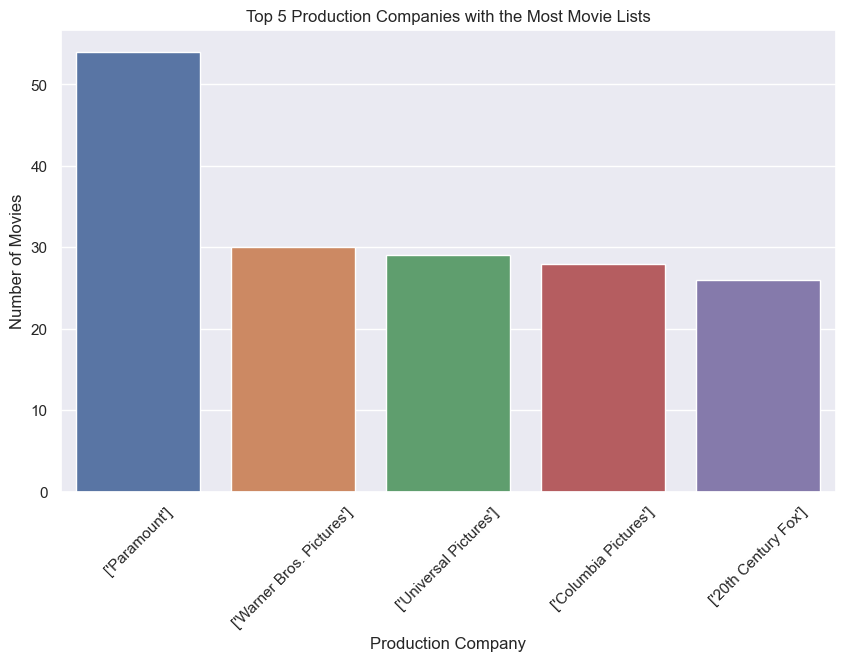

In [14]:
top_production_companies = sorted_dupid_data["production_companies"].value_counts().head(5)

# Plot histogram for top production companies
plt.figure(figsize=(10, 6))
sb.barplot(x=top_production_companies.index, y=top_production_companies.values)
plt.title("Top 5 Production Companies with the Most Movie Lists")
plt.xlabel("Production Company")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

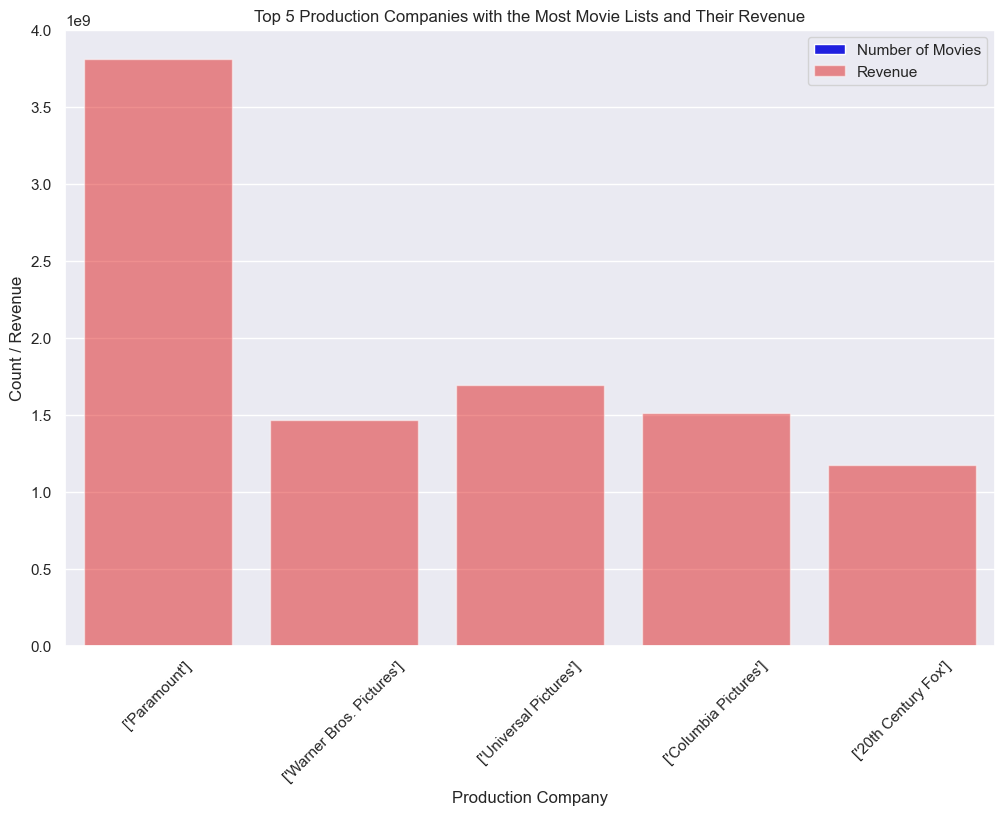

In [19]:
top_production_companies = sorted_dupid_data.groupby("production_companies").agg({"no_of_movies": "first", "revenue": "sum"}).sort_values(by="no_of_movies", ascending=False).head(5)
top_production_companies.head()
# Plot histogram for top production companies
plt.figure(figsize=(12, 8))
sb.barplot(x=top_production_companies.index, y=top_production_companies["no_of_movies"], color='blue', label='Number of Movies')
sb.barplot(x=top_production_companies.index, y=top_production_companies["revenue"], color='red', alpha=0.5, label='Revenue')
plt.title("Top 5 Production Companies with the Most Movie Lists and Their Revenue")
plt.xlabel("Production Company")
plt.ylabel("Count / Revenue")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [20]:
total_revenue_df = pd.read_csv('your_file.csv')
total_revenue_df['revenue'] = total_revenue_df['revenue'].astype(float)
total_revenue_df.head()

NameError: name 'total_revenue_df' is not defined

In [ ]:
plt.figure(figsize=(15, 6))
sb.histplot(data=total_revenue_df, x="revenue", bins=30)  # Adjust the number of bins as needed
plt.title("Total Revenue Distribution of Production Companies with Duplicate Entries")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
def format_tick(x, pos):
    return '{:,.0f}'.format(x)

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_tick))

plt.show()


In [ ]:
#now, ill be using the vote_count and vote_average to check if the number of votes contribute to the high ratings
#or there isnt any relationship between them (meaning low vote counts can have high rating too)

In [ ]:
votes = pd.DataFrame(data[['vote_count','vote_average', 'popularity']])
votes.head(n=10)

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(14, 12))

count = 0
for var in votes:
    sb.boxplot(data = votes[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = votes[var], ax = axes[count,1])
    sb.violinplot(data = votes[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
#vote_count is highly left-skewed but despite that it seems as though the ratings average are still relatively high

for var in votes:
    print(votes[var].describe())

In [ ]:
print(votes.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(votes.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
#lets check if the budget have the any correlation with the vote rate 
#budget can potentially affect the production quality which in turn can affect the popularity rating of the movie

In [ ]:
budget_vote = pd.DataFrame(data[['budget', 'popularity']])
budget_vote.head()

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(14, 7))

count = 0
for var in budget_vote:
    sb.boxplot(data = budget_vote[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = budget_vote[var], ax = axes[count,1])
    sb.violinplot(data = budget_vote[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
print(budget_vote.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(budget_vote.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
sb.pairplot(data = budget_vote)